In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [15]:
# Actual sales (last 52 weeks from SARIMA train-test split)
test_actual = pd.read_csv('/workspaces/Demand-Forecasting-Project/data/test_actual.csv', index_col=0, parse_dates=True)

In [16]:
# SARIMA forecast
forecast_sarima = pd.read_csv('/workspaces/Demand-Forecasting-Project/data/forecast_sarima.csv', index_col=0, parse_dates=True)

In [17]:
# LSTM forecast
forecast_lstm = pd.read_csv('/workspaces/Demand-Forecasting-Project/data/forecast_sarima.csv', index_col=0, parse_dates=True)

In [18]:
print("Shapes:")
print("Test Actual:", test_actual.shape)
print("SARIMA Forecast:", forecast_sarima.shape)
print("LSTM Forecast:", forecast_lstm.shape)

print("\nHead of each dataset:")
print(test_actual.head())
print(forecast_sarima.head())
print(forecast_lstm.head())

Shapes:
Test Actual: (52, 1)
SARIMA Forecast: (52, 1)
LSTM Forecast: (52, 1)

Head of each dataset:
            Weekly_Sales
Date                    
2011-11-04   48655544.30
2011-11-11   48474224.75
2011-11-18   46438980.56
2011-11-25   66593605.26
2011-12-02   49390556.49
            Weekly_Sales
2011-11-04  4.758238e+07
2011-11-11  4.781693e+07
2011-11-18  4.679181e+07
2011-11-25  6.748104e+07
2011-12-02  5.156758e+07
            Weekly_Sales
2011-11-04  4.758238e+07
2011-11-11  4.781693e+07
2011-11-18  4.679181e+07
2011-11-25  6.748104e+07
2011-12-02  5.156758e+07


In [19]:
# Ensure all series are of same length
forecast_sarima = forecast_sarima.iloc[:len(test_actual)]
forecast_lstm = forecast_lstm.iloc[:len(test_actual)]

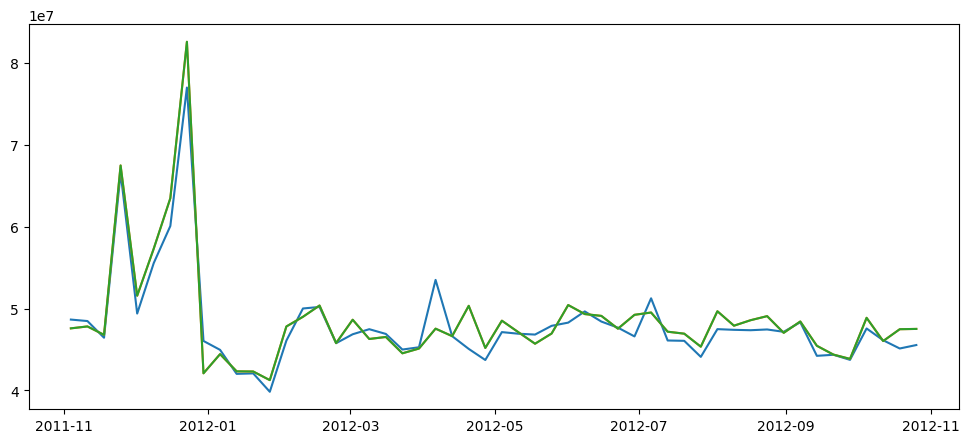

In [20]:
plt.figure(figsize=(12,5))
plt.plot(test_actual.index, test_actual['Weekly_Sales'], label='Actual Sales')
plt.plot(forecast_sarima.index, forecast_sarima['Weekly_Sales'], label='SARIMA Forecast')
plt.plot(forecast_lstm.index, forecast_lstm['Weekly_Sales'], label='LSTM Forecast')

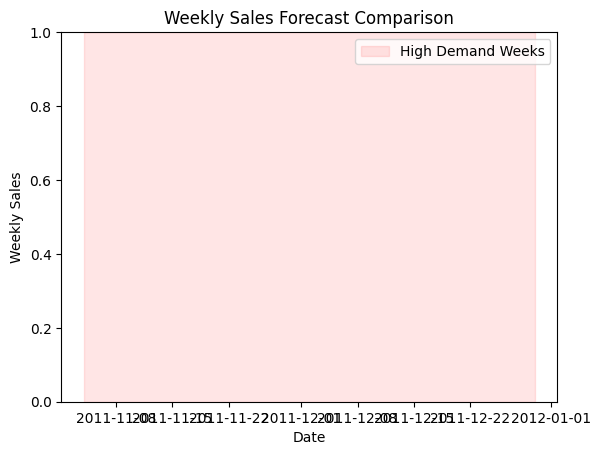

In [21]:
# Highlight high-demand weeks (first 8 weeks as example)
plt.axvspan(test_actual.index[0], test_actual.index[0]+pd.Timedelta(weeks=8), color='red', alpha=0.1, label='High Demand Weeks')

plt.title('Weekly Sales Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [22]:
rmse_sarima = np.sqrt(mean_squared_error(test_actual['Weekly_Sales'], forecast_sarima['Weekly_Sales']))
mape_sarima = mean_absolute_percentage_error(test_actual['Weekly_Sales'], forecast_sarima['Weekly_Sales']) * 100

rmse_lstm = np.sqrt(mean_squared_error(test_actual['Weekly_Sales'], forecast_lstm['Weekly_Sales']))
mape_lstm = mean_absolute_percentage_error(test_actual['Weekly_Sales'], forecast_lstm['Weekly_Sales']) * 100

print(f"SARIMA - RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
print(f"LSTM   - RMSE: {rmse_lstm:.2f}, MAPE: {mape_lstm:.2f}%")

# Optional: Display metrics in a table
metrics_df = pd.DataFrame({
    'Model': ['SARIMA', 'LSTM'],
    'RMSE': [rmse_sarima, rmse_lstm],
    'MAPE (%)': [mape_sarima, mape_lstm]
})
print("\nForecast Performance Metrics:")
print(metrics_df)

SARIMA - RMSE: 1912299.01, MAPE: 2.69%
LSTM   - RMSE: 1912299.01, MAPE: 2.69%

Forecast Performance Metrics:
    Model          RMSE  MAPE (%)
0  SARIMA  1.912299e+06  2.689536
1    LSTM  1.912299e+06  2.689536


In [23]:
# Business Insights

print("\n--- Business Insights ---\n")
print("""
1. Inventory Management:
   - Increase stock during high-demand weeks (e.g., holidays, promotions)
   - Reduce stock during low-demand weeks to minimize holding costs

2. Staffing & Operations:
   - Allocate more staff during high-sales periods for smooth operations
   - Flexible staffing during low-sales periods reduces overtime costs

3. Promotions & Marketing:
   - Schedule promotions/discounts in low-sales weeks to boost revenue
   - High-sales weeks can focus on premium products and bundle offers

4. Financial & Budget Planning:
   - Forecasts guide purchasing, logistics, and operations budgets
   - Enables data-driven decisions across departments

5. Model Insights:
   - SARIMA captures seasonal trends well, easy to interpret
   - LSTM captures complex patterns, better for subtle trends
   - Combining both forecasts increases robustness for business decisions
""")


--- Business Insights ---


1. Inventory Management:
   - Increase stock during high-demand weeks (e.g., holidays, promotions)
   - Reduce stock during low-demand weeks to minimize holding costs

2. Staffing & Operations:
   - Allocate more staff during high-sales periods for smooth operations
   - Flexible staffing during low-sales periods reduces overtime costs

3. Promotions & Marketing:
   - Schedule promotions/discounts in low-sales weeks to boost revenue
   - High-sales weeks can focus on premium products and bundle offers

4. Financial & Budget Planning:
   - Forecasts guide purchasing, logistics, and operations budgets
   - Enables data-driven decisions across departments

5. Model Insights:
   - SARIMA captures seasonal trends well, easy to interpret
   - LSTM captures complex patterns, better for subtle trends
   - Combining both forecasts increases robustness for business decisions

